In [52]:
import pandas as pd
import os
import os.path as osp
import glob
import matplotlib.pyplot as plt
import pydicom
import seaborn as sns
import math

data_root = 'datasets/NSCLC/manifest-1622561851074'
patient_dirs = os.listdir(osp.join(data_root, 'NSCLC Radiogenomics'))
metadata_path =  osp.join(data_root, 'metadata.csv')
clinical_path = osp.join(data_root, 'NSCLCR01Radiogenomic_DATA_LABELS_2018-05-22_1500-shifted.csv')
aim_anno_path = osp.join(data_root, 'AIM_files_updated-11-10-2020')

# Metadata Analysis

In [32]:
df_metadata = pd.read_csv(metadata_path)
print(df_metadata.columns)
df_metadata.head(2)

Index(['Series UID', 'Collection', '3rd Party Analysis',
       'Data Description URI', 'Subject ID', 'Study UID', 'Study Description',
       'Study Date', 'Series Description', 'Manufacturer', 'Modality',
       'SOP Class Name', 'SOP Class UID', 'Number of Images', 'File Size',
       'File Location', 'Download Timestamp'],
      dtype='object')


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.4334.1501.104663944588...,NSCLC Radiogenomics,NaN,https://doi.org/10.7937/K9/TCIA.2017.7hs46erv,AMC-001,1.3.6.1.4.1.14519.5.2.1.4334.1501.227933499470...,PETCT Lung Cancer,04-30-1994,SCOUT,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,1,3.91 MB,./NSCLC Radiogenomics/AMC-001/04-30-1994-NA-PE...,2024-08-22T16:48:18.095
1,1.3.6.1.4.1.14519.5.2.1.4334.1501.172353892710...,NSCLC Radiogenomics,NaN,https://doi.org/10.7937/K9/TCIA.2017.7hs46erv,AMC-001,1.3.6.1.4.1.14519.5.2.1.4334.1501.227933499470...,PETCT Lung Cancer,04-30-1994,WB NAC P690,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,263,20.38 MB,./NSCLC Radiogenomics/AMC-001/04-30-1994-NA-PE...,2024-08-22T16:48:37.586


In [33]:
print('Number of patients:', len(df_metadata['Subject ID'].unique()))

Number of patients: 211


In [34]:
print('Modality Types:', df_metadata['Modality'].unique())

Modality Types: ['CT' 'PT' 'SEG']


In [36]:
# type of DICOM data ?
print('SOP Class Name:', df_metadata['SOP Class Name'].unique())

SOP Class Name: ['CT Image Storage' 'Positron Emission Tomography Image Storage'
 'Segmentation Storage']


In [38]:
# type of studies
print('Study Descriptions:')
print(df_metadata['Study Description'].unique())

Study Descriptions:
['PETCT Lung Cancer' 'CT Thorax' 'CT THORAX'
 'ThoraxLOWDOSECHESTCTNONCON Adult' 'FDG PET CT Clinical Wh'
 'PET CT LUNG CANCER' 'ThoraxCHESTNONCONTRAST Adult'
 'CT CHEST ABD PELVIS WITH CON' 'CT THORAX WITH CONTRAST'
 'ThoraxLOWDOSENONCONCHEST Adult' 'CT CHEST REFERENCE ONLY' 'PET CT BODY'
 'CT ANGIO THORAX' 'CT Chest Reference Only' 'ThoraxCHESTCONTRAST Adult'
 'Thorax01ROUTINECHEST Adult' 'ThoraxLOWDOSECHESTSCREENING Adult'
 'ThoraxNONCONTRASTCHEST Adult' 'VascularGATEDCHESTCTA Adult'
 'PET CT Sarcoma Initial' 'PET REFERENCE ONLY' 'PETCT Body Reference Only'
 'CT CHEST WO' 'PET IMAGE WCT SKULL-' 'Thorax01NONCONCHEST Adult'
 'CT CHEST WITH' 'CT CHEST WO CONTRAST' 'PET IMAGE WCT LMTD'
 'CT THORAX WO' 'CT CHEST' 'lung' 'PETCT Uncovered Diagn'
 'PETCT Lung Nodu' 'CT Biopsy Lung Procedu' 'CT CHEST W'
 'CT CHEST W CONTRAST' 'CT THORAX WO DYE' 'CT ANGIOGRAPHY CHEST'
 'PET IMAGE WCT SKULL-T' 'CT CHEST WCON' 'PETCT LUNG MASS'
 'e1 PET IMAGE WCT SKULL-' 'PETCT LUNG SPN' 'PE

# Clinical Data Analysis

In [39]:
df_clinic = pd.read_csv(clinical_path)
print(df_clinic.columns)
df_clinic.head(3)

Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and sur

,Case ID,Patient affiliation,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,...,Recurrence,Recurrence Location,Date of Recurrence,Date of Last Known Alive,Survival Status,Date of Death,Time to Death (days),CT Date,Days between CT and surgery,PET Date
0,AMC-001,Stanford,34,Not Collected,Male,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,yes,distant,10/7/1994,1/7/1997,Dead,1/7/1997,872.0,8/10/1994,9,Not Collected
1,AMC-002,Stanford,33,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,3/20/1992,Alive,NaN,NaN,2/19/1992,3,Not Collected
2,AMC-003,Stanford,69,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,6/19/1996,Alive,NaN,NaN,2/23/1995,28,Not Collected


<Axes: xlabel='Recurrence', ylabel='count'>

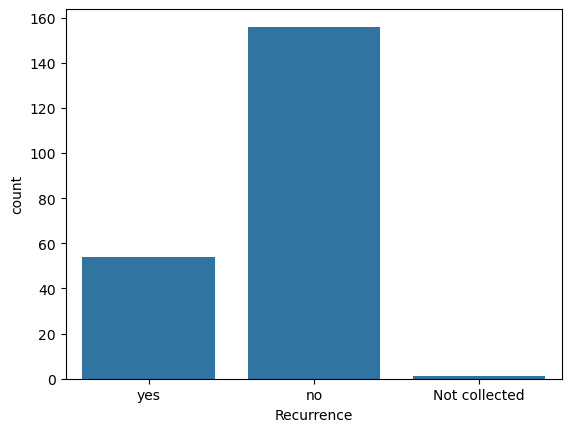

In [45]:
sns.countplot(data=df_clinic, x='Recurrence')

<Axes: xlabel='Gender', ylabel='count'>

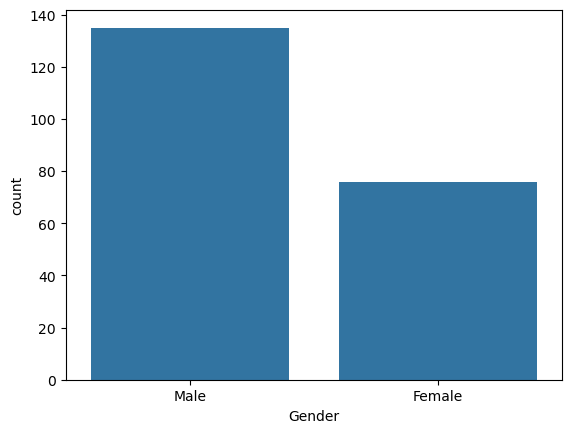

In [46]:
sns.countplot(data=df_clinic, x='Gender')

# Images Data Analysis

In [ ]:
'''
Data structure:

root_image_directory
        |__patient_1
        |       |__Study_1
        |       |       |__*.dcm
        |       |__ ...
        |__ ...
'''

In [55]:
def vis_dicom_list(img_dir, limit=10):
    dcm_paths = glob.glob(osp.join(img_dir, '*.dcm'))[:limit]
    num_cols = 5
    num_rows = math.ceil((len(dcm_paths) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, num_rows*5))

    col_idx = 0
    row_idx = 0

    for path in dcm_paths:
        # plot in next row
        if col_idx == num_cols:
            col_idx = 0
            row_idx += 1

        ds = pydicom.dcmread(path)
        axes[row_idx, col_idx].imshow(ds.pixel_array, cmap=plt.cm.bone)

        col_idx += 1
    
    plt.show()

Example: R01-001 - NA-CT CHEST ABD PELVIS - THORAX

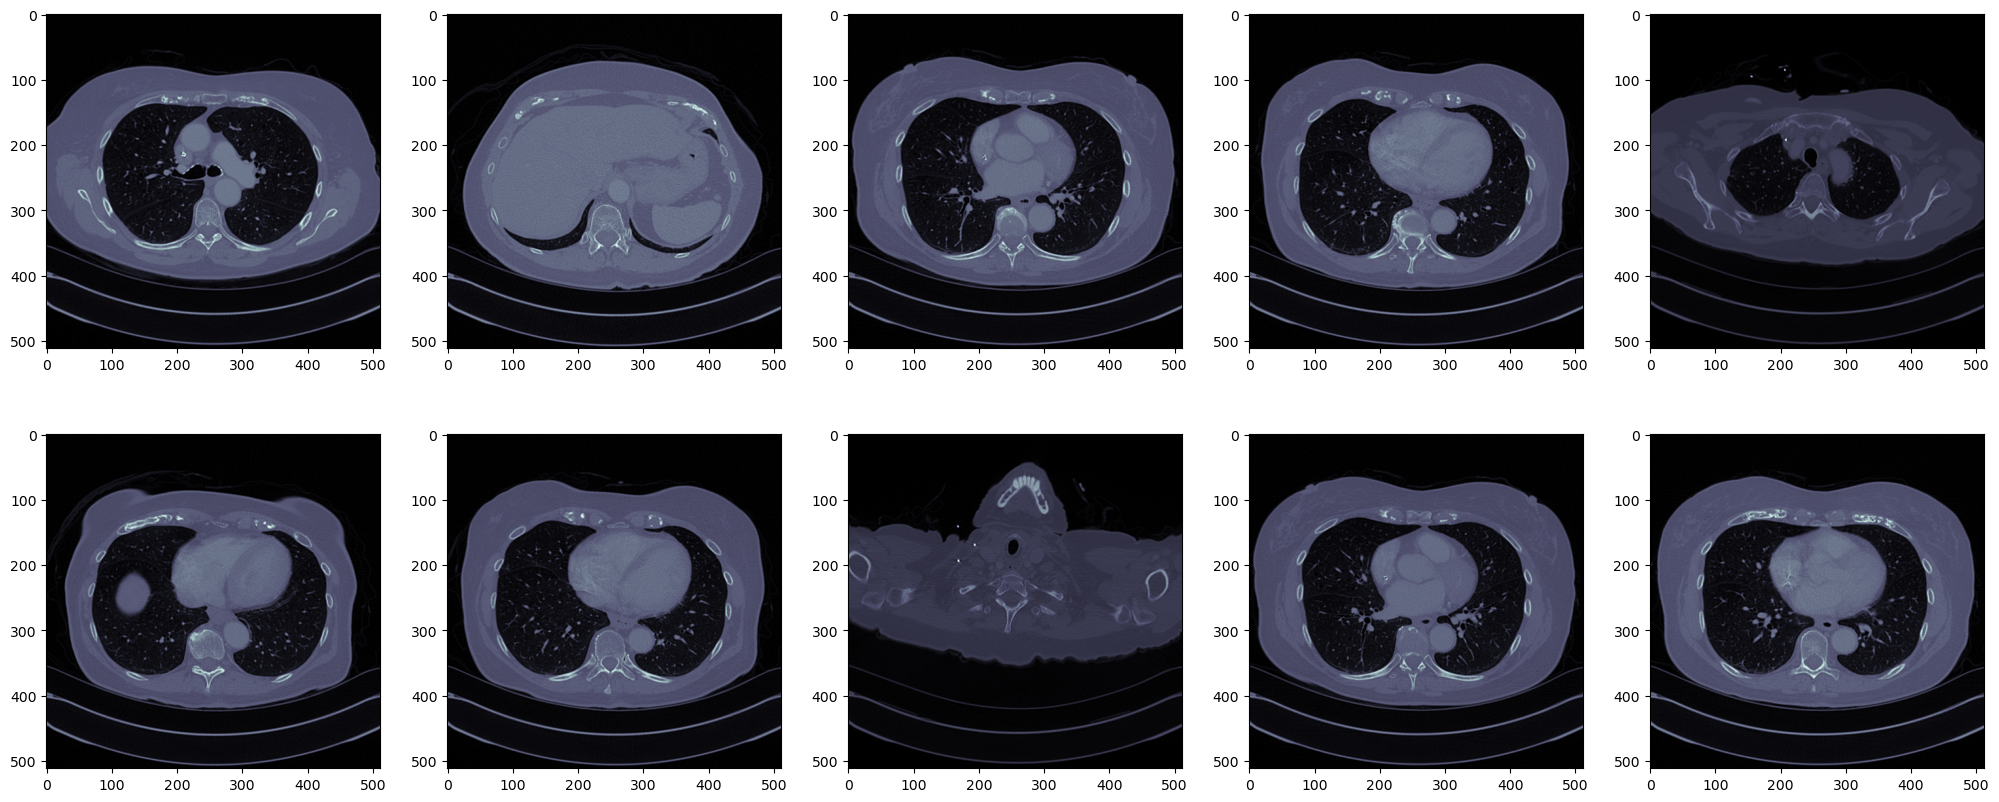

In [60]:
vis_dicom_list('datasets/NSCLC/manifest-1622561851074/NSCLC Radiogenomics/R01-001/09-06-1990-NA-CT CHEST ABD PELVIS WITH CON-98785/3.000000-THORAX 1.0 B45f-95741')

Example: R01-001 - NA-PET CT LUNG CANCER - CT 

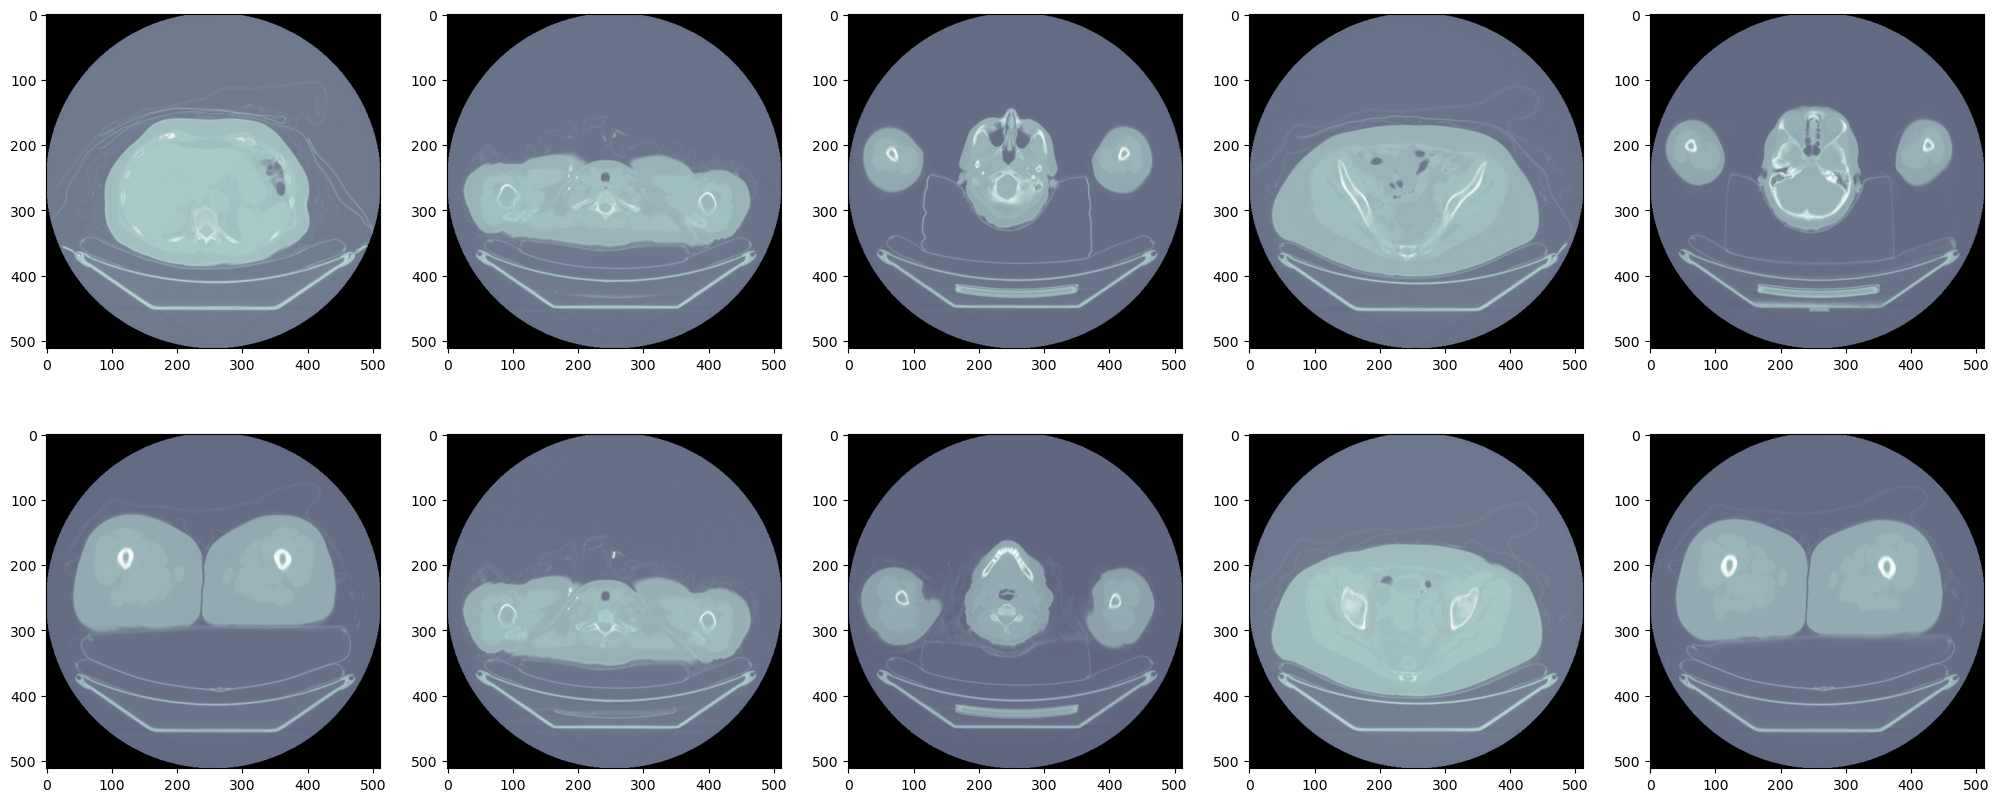

In [61]:
vis_dicom_list('datasets/NSCLC/manifest-1622561851074/NSCLC Radiogenomics/R01-001/10-17-1990-NA-PET CT LUNG CANCER-44295/2.000000-CT Images-75499')

# NSCLC Curated Data Analysis

In [72]:
import nibabel as nib

nii_sample = nib.load('datasets/NSCLC-Curated/images/images_original/R01-001.nii').get_fdata()

In [73]:
# a .nii file includes information of multiple .dcm slice (3D image).
# For example, the below file consist of 304 slice of patient R01-001

nii_sample.shape

(512, 512, 304)

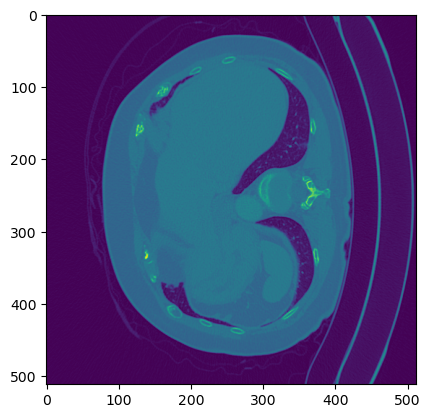

In [76]:
plt.imshow(nii_sample[:,:, 59])